Enter the URL of the image: https://c4.wallpaperflare.com/wallpaper/447/449/84/netural-nature-wallpaper-preview.jpg


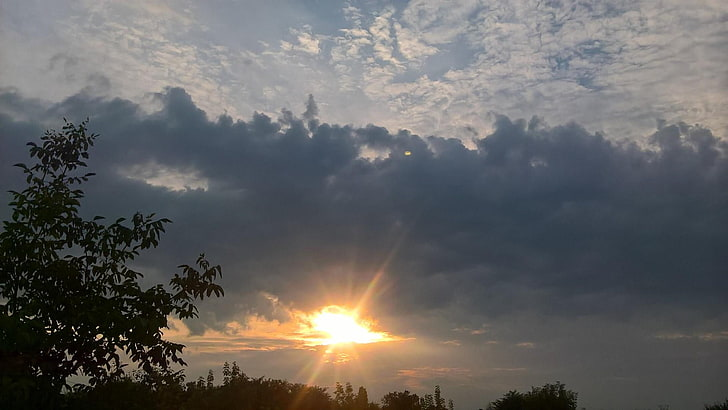

Generated Caption: a picture of a sunset
Predicted Emotion: joy


In [3]:
from PIL import Image
import requests
from transformers import AutoProcessor, BlipForConditionalGeneration, AutoTokenizer, AutoModelForSequenceClassification
import torch
from IPython.display import display

# Load the processor and model for image captioning
processor = AutoProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Load the pre-trained emotion classification model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("bhadresh-savani/bert-base-uncased-emotion")
model_emotion = AutoModelForSequenceClassification.from_pretrained("bhadresh-savani/bert-base-uncased-emotion")

def get_image_caption(image):
    # Prepare the input for image captioning
    text = "A picture of"
    inputs = processor(images=image, text=text, return_tensors="pt")

    # Generate the image caption with max_new_tokens to control the length
    outputs = model.generate(**inputs, max_new_tokens=50)  # Adjust 50 to the desired length

    # Decode the output tokens into a readable string
    caption = processor.decode(outputs[0], skip_special_tokens=True)
    return caption

def get_emotion(caption):
    # Tokenize the generated caption
    inputs_emotion = tokenizer(caption, return_tensors="pt")

    # Get the model predictions for emotion classification
    with torch.no_grad():
        outputs_emotion = model_emotion(**inputs_emotion)

    # Get the predicted emotion class
    logits = outputs_emotion.logits
    predicted_class_id = logits.argmax(-1).item()
    predicted_emotion = model_emotion.config.id2label[predicted_class_id]
    return predicted_emotion

def main():
    # URL of the image

    url = input("Enter the URL of the image: ")

    try:
        # Load the image
        image = Image.open(requests.get(url, stream=True).raw)

        # Display the image
        display(image)

        # Get and display the caption
        caption = get_image_caption(image)
        print(f"Generated Caption: {caption}")

        # Get and display the emotion
        emotion = get_emotion(caption)
        print(f"Predicted Emotion: {emotion}")

    except Exception as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    main()
